In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
print(train[:5])

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


F:\py34\Anaconda3\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
train['Date'] = pd.to_datetime(train['Date'])
train[:5]['Date'].dt.dayofweek

0    4
1    4
2    4
3    4
4    4
dtype: int64

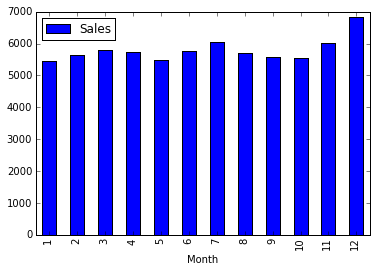

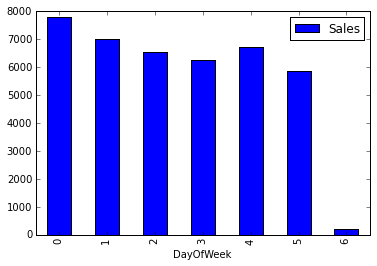

In [13]:
train['DayOfWeek'] = train['Date'].dt.dayofweek
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year
avg_month = train[['Sales', 'Month']].groupby('Month').mean()
avg_month.plot(kind='bar')
avg_day = train[['Sales', 'DayOfWeek']].groupby('DayOfWeek').mean()
avg_day.plot(kind='bar')

In [17]:
#group_dayofweek = train.groupby('DayOfWeek')
#sales by day of week
sale_dayofweek = pd.pivot_table(train, values='Sales', index=['Year','Store'], columns=['DayOfWeek'])
#sales by month
sale_month = pd.pivot_table(train, values='Sales', index=['Year','Store'], columns=['Month'])
sale_month[:5]


Month                1            2            3            4            5   \
Year Store                                                                    
2013 1      4142.935484  4473.964286  4682.870968  3933.633333  3813.709677   
     2      3715.193548  3968.357143  4210.483871  3895.933333  3754.161290   
     3      5343.645161  5720.250000  6102.548387  5739.600000  5495.935484   
     4      7571.387097  8231.178571  8242.387097  7566.033333  7589.806452   
     5      3530.387097  3611.642857  3769.677419  3538.033333  3557.806452   

Month                6            7            8            9            10  \
Year Store                                                                    
2013 1      3780.366667  4130.064516  3816.774194  3628.900000  3698.096774   
     2      3862.366667  4476.709677  4037.516129  3969.366667  3882.645161   
     3      5682.066667  6658.903226  5751.677419  5443.000000  5428.290323   
     4      7840.900000  7357.935484  7685.903226  7318.333333  7254.935484   
     5      3509.333333  4899.741935  4063.516129  3677.933333  3735.645161   

Month                11           12  
Year Store                            
2013 1      4253.200000  4682.838710  
     2      4287.600000  4845.612903  
     3      5652.666667  6915.064516  
     4      7964.600000  9184.677419  
     5      3985.566667  4758.580645

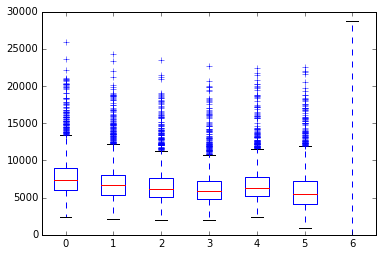

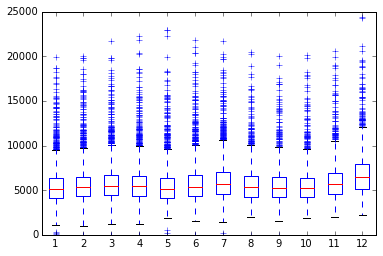

In [18]:
sale_dayofweek.plot(kind='box')
sale_month.plot(kind='box')